### It is a content based song recommendation system which finds similar songs based on artists, album name, track genre and popularity.

In [1]:
# Importing all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Import the data
df = pd.read_csv("data/dataset.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
# We need to drop the rows having missing data
df.dropna(inplace=True)
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
# Sorting the dataframe according to the popularity
df.sort_values("popularity", ascending=False, inplace=True)
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.2380,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.2380,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.5500,128.033,4,hip-hop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.8500,124.980,4,reggaeton
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.3040,128.040,4,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49778,49778,7ma2fbKDEvJeGJAx0YedAs,The Prophet,The Hardcore Archive Part 3 (1997),Turn It Up (Original Mix) - Extended Mix,0,272187,False,0.500,0.915,...,-3.850,1,0.0492,0.00220,0.924000,0.0971,0.0778,94.893,4,hardstyle
49776,49776,04ILxTQAP9e9Ng4IvdNs6m,The Prophet,The Hardcore Archive Part 3 (1997),The Breaks - Original Mix,0,139909,False,0.586,0.974,...,-3.468,0,0.1920,0.00460,0.391000,0.3870,0.2730,180.008,4,hardstyle
49775,49775,4rU28rW9Gy49LmM4ibb0xC,The Prophet,The Hardcore Archive Part 3 (1997),Damn (Original Mix) - Extended Mix,0,298109,False,0.631,0.993,...,-3.670,0,0.0635,0.00065,0.787000,0.4400,0.2830,92.462,4,hardstyle
49773,49773,3mDnDIDXaKNR1fwklfDC4P,The Prophet,The Hardcore Archive Part 3 (1997),I like It Loud - Original Mix,0,205392,False,0.676,0.961,...,-5.926,1,0.1430,0.00135,0.000529,0.2500,0.0985,187.157,4,hardstyle


## There are duplicate songs present in tha data. It should be removed

In [6]:
df.drop_duplicates(subset="track_name", inplace=True)
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,4,dance
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.012500,0.033000,0.2300,0.550,128.033,4,hip-hop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.583000,0.000002,0.2180,0.850,124.980,4,reggaeton
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.003830,0.000007,0.3710,0.304,128.040,4,pop
68304,68304,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,...,-5.198,0,0.2530,0.099300,0.000291,0.1260,0.187,106.672,4,latino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53547,53547,52y30MrhmdXnF0VaxJPLNz,Kungs;Cookin' On 3 Burners,10's Music Grandi Successi,This Girl - Kungs Vs. Cookin' On 3 Burners,0,195561,False,0.792,0.703,...,-4.678,0,0.0391,0.087400,0.000129,0.2250,0.472,121.975,4,house
100672,100672,4JI4Swf1PJQt4FihB3NjRE,Bahiano,Rock x siempre,Oyelo,0,188933,False,0.811,0.748,...,-4.269,1,0.0788,0.260000,0.000000,0.1490,0.922,143.084,4,ska
53542,53542,4nrW9uaXU2GqPZl5zgNRNp,Kungs;Stargate;GOLDN,Queda poco para la PAES,Be Right Here,0,191000,False,0.626,0.859,...,-3.943,0,0.0408,0.003640,0.000019,0.1310,0.113,123.021,4,house
53498,53498,0bgCV5x6FxiaDC9PRLY0xV,Jess Glynne,Happy Commute,Rollin,0,218040,True,0.716,0.752,...,-3.504,0,0.0533,0.000804,0.000000,0.0757,0.708,117.025,4,house


## Visualizing the distribution of songs according to their popularity

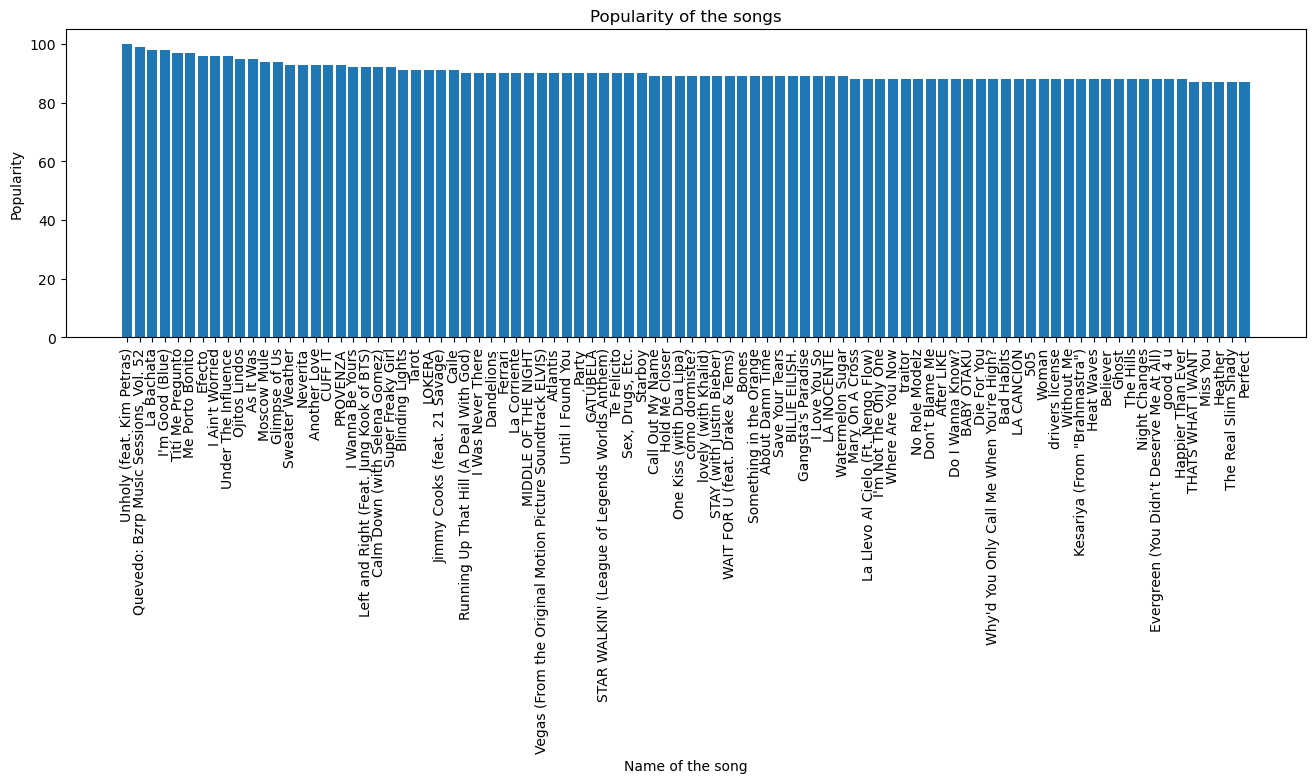

In [7]:
fig, ax = plt.subplots(figsize=(16,4))
ax.bar(df["track_name"][:90], df["popularity"][:90])
ax.set(title="Popularity of the songs",
       xlabel = "Name of the song",
       ylabel = "Popularity")
plt.xticks(rotation=90)
plt.show()

## Visualizing the number of songs from each artist

In [8]:
df.artists.value_counts()[:50]

artists
George Jones                              200
my little airport                         162
The Beatles                               147
Håkan Hellström                           122
Hank Williams                             109
Scooter                                   108
Glee Cast                                 104
BTS                                       100
Arctic Monkeys                             99
Charlie Brown Jr.                          98
Germaine Franco                            95
Almafuerte                                 92
Jay Chou                                   89
Vybz Kartel                                89
Sujatha                                    82
Sarah, the Illstrumentalist                81
Pink Floyd                                 79
Dan Gibson's Solitudes                     79
Linkin Park                                78
CoComelon                                  77
The Prophet                                76
Nogizaka46                

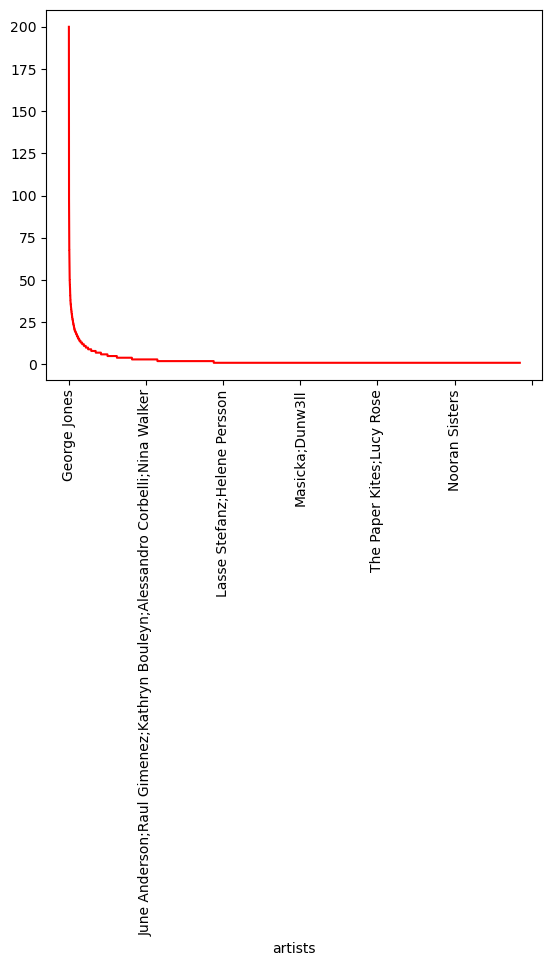

In [9]:
df.artists.value_counts().plot(color = "red")
plt.xticks(rotation=90)
plt.show()

## Visualizing the distribution of track genres

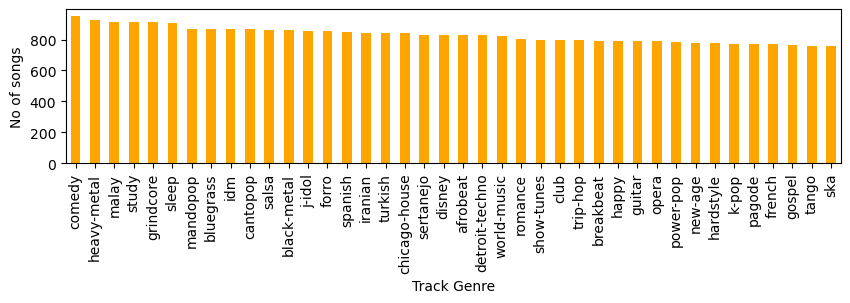

In [10]:
df.track_genre.value_counts()[:40].plot(kind="bar", color = "orange", figsize = (10, 2))
plt.ylabel("No of songs")
plt.xlabel("Track Genre")
plt.xticks(rotation=90)
plt.show()

## Made a collection of tags to find similarities between the songs (Artist, Album, Genre, Popularity)

In [11]:
# Creating a new column `tags`
df["tags"] = df["artists"].str.replace(" ", "")+" "+df["track_genre"].str.replace(" ", "")+" "+df["album_name"].str.replace(" ", "")+" "+df["popularity"].astype(str).str.replace(" ", "")
df["tags"] = df["tags"].str.replace(";", " ")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,tags
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,1,0.0864,0.013000,0.000005,0.2660,0.238,131.121,4,dance,SamSmith KimPetras dance Unholy(feat.KimPetras...
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,1,0.0440,0.012500,0.033000,0.2300,0.550,128.033,4,hip-hop,Bizarrap Quevedo hip-hop Quevedo:BzrpMusicSess...
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,0,0.0364,0.583000,0.000002,0.2180,0.850,124.980,4,reggaeton,ManuelTurizo reggaeton LaBachata 98
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,0,0.0343,0.003830,0.000007,0.3710,0.304,128.040,4,pop,DavidGuetta BebeRexha pop I'mGood(Blue) 98
68304,68304,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,...,0,0.2530,0.099300,0.000291,0.1260,0.187,106.672,4,latino,BadBunny latino UnVeranoSinTi 97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53547,53547,52y30MrhmdXnF0VaxJPLNz,Kungs;Cookin' On 3 Burners,10's Music Grandi Successi,This Girl - Kungs Vs. Cookin' On 3 Burners,0,195561,False,0.792,0.703,...,0,0.0391,0.087400,0.000129,0.2250,0.472,121.975,4,house,Kungs Cookin'On3Burners house 10'sMusicGrandiS...
100672,100672,4JI4Swf1PJQt4FihB3NjRE,Bahiano,Rock x siempre,Oyelo,0,188933,False,0.811,0.748,...,1,0.0788,0.260000,0.000000,0.1490,0.922,143.084,4,ska,Bahiano ska Rockxsiempre 0
53542,53542,4nrW9uaXU2GqPZl5zgNRNp,Kungs;Stargate;GOLDN,Queda poco para la PAES,Be Right Here,0,191000,False,0.626,0.859,...,0,0.0408,0.003640,0.000019,0.1310,0.113,123.021,4,house,Kungs Stargate GOLDN house QuedapocoparalaPAES 0
53498,53498,0bgCV5x6FxiaDC9PRLY0xV,Jess Glynne,Happy Commute,Rollin,0,218040,True,0.716,0.752,...,0,0.0533,0.000804,0.000000,0.0757,0.708,117.025,4,house,JessGlynne house HappyCommute 0


In [12]:
final_df = pd.DataFrame({"Song": df["track_name"], "tags": df["tags"]})
final_df

,Song,tags
20001,Unholy (feat. Kim Petras),SamSmith KimPetras dance Unholy(feat.KimPetras...
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap Quevedo hip-hop Quevedo:BzrpMusicSess...
89411,La Bachata,ManuelTurizo reggaeton LaBachata 98
81210,I'm Good (Blue),DavidGuetta BebeRexha pop I'mGood(Blue) 98
68304,Tití Me Preguntó,BadBunny latino UnVeranoSinTi 97
...,...,...
53547,This Girl - Kungs Vs. Cookin' On 3 Burners,Kungs Cookin'On3Burners house 10'sMusicGrandiS...
100672,Oyelo,Bahiano ska Rockxsiempre 0
53542,Be Right Here,Kungs Stargate GOLDN house QuedapocoparalaPAES 0
53498,Rollin,JessGlynne house HappyCommute 0


In [13]:
final_df["tags"] = final_df["tags"].str.lower()
final_df

,Song,tags
20001,Unholy (feat. Kim Petras),samsmith kimpetras dance unholy(feat.kimpetras...
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",bizarrap quevedo hip-hop quevedo:bzrpmusicsess...
89411,La Bachata,manuelturizo reggaeton labachata 98
81210,I'm Good (Blue),davidguetta beberexha pop i'mgood(blue) 98
68304,Tití Me Preguntó,badbunny latino unveranosinti 97
...,...,...
53547,This Girl - Kungs Vs. Cookin' On 3 Burners,kungs cookin'on3burners house 10'smusicgrandis...
100672,Oyelo,bahiano ska rockxsiempre 0
53542,Be Right Here,kungs stargate goldn house quedapocoparalapaes 0
53498,Rollin,jessglynne house happycommute 0


### From `nltk` used `PorterStemmer()` to tokenize the space separated words in the tags column

In [14]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)

In [15]:
final_df["tokens"] = final_df["tags"].apply(lambda x: tokenization(x))

## Due to computational constraints, the size of the data is reduced

In [16]:
sdf = final_df.sample(40000, random_state=42)
sdf.reset_index(drop=True, inplace=True)
sdf

,Song,tags,tokens
0,God is A DJ - Extended,faithless davidguetta trip-hop godisadj 35,faithless davidguetta trip-hop godisadj 35
1,Tu Alma Mía / Adelita,todostusmuertos hardcore greatesthits 36,todostusmuerto hardcor greatesthit 36
2,Seven Funerals,despiseyou grindcore andonandon... 17,despisey grindcor andonandon ... 17
3,I Want to Know What Love Is - 1999 Remaster,foreigner hard-rock agentprovocateur 79,foreign hard-rock agentprovocateur 79
4,Aamhi Vithlache Warkari,bhimsenjoshi pt.jitenderabhisheki ajitkadkade ...,bhimsenjoshi pt.jitenderabhisheki ajitkadkad c...
...,...,...,...
39995,Lack of Comprehension,death death-metal human(deluxeversion) 46,death death-met human ( deluxevers ) 46
39996,How Does A Moment Last Forever (Montmartre),emmawatson show-tunes beautyandthebeast(origin...,emmawatson show-tun beautyandthebeast ( origin...
39997,Melody Radio Mix,dimitrivegas&likemike likemike steveaoki ummet...,dimitrivega & likemik likemik steveaoki ummeto...
39998,Versuche No. 4 :Fur Computer,kiawaschsahebnassagh iranian schlafliedunterde...,kiawaschsahebnassagh iranian schlafliedunterde...


In [17]:
# Convert a collection of raw documents to a matrix of TF-IDF features
tfidvector = TfidfVectorizer(analyzer="word",stop_words="english")
matrix = tfidvector.fit_transform(sdf["tokens"])

## Cosine similarity is used to measure the similarity between two vectors of an inner product space. Higher value means higher similarity.

In [18]:
similarity = cosine_similarity(matrix)

In [19]:
def song_rec(song_name):
    """
    Returns a dataframe with five songs similar to the input song.
    """
    if song_name in sdf["Song"].values:
        idx = sdf[sdf["Song"] == song_name].index[0]
        distance = sorted(list(enumerate(similarity[idx])), reverse =True, key = lambda x: x[1])

        songs = []
        for s_id in distance[1:6]:
            songs.append(sdf.iloc[s_id[0]].Song)
        songs_list = pd.DataFrame({"Recommendations": songs})
        return songs_list
    else:
        return "Songs unavailable... Check your input"

In [21]:
song_name = input("Enter the song name...")
song_rec(song_name)

Enter the song name... I'm Good (Blue)


,Recommendations
0,I'm Good (Blue) - Extended
1,I'm Good (Blue) - REAPER Extended Remix
2,Last Hurrah - David Guetta Remix
3,Say My Name
4,"Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afro..."
